In [6]:
import yfinance as yf            
import pandas as pd             
import matplotlib.pyplot as plt 
import datetime

In [18]:
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2023, 12, 31)

# Download Microsoft stock data
msft = yf.download("MSFT", start=start, end=end)
print(msft.head())

C:\Users\Dell\AppData\Local\Temp\ipykernel_15868\2716839780.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft = yf.download("MSFT", start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2023-01-03  234.423569  240.460771  232.290481  237.848239  25740000
2023-01-04  224.169128  227.857977  221.096711  227.280679  50623400
2023-01-05  217.525299  222.652526  216.987134  222.310053  39585600
2023-01-06  220.088882  220.901020  214.628992  218.200429  43613600
2023-01-09  222.231750  226.263087  221.537040  221.576173  27369800


In [19]:
msft.columns = msft.columns.droplevel(1)
print(msft.head())

Price            Close        High         Low        Open    Volume
Date                                                                
2023-01-03  234.423569  240.460771  232.290481  237.848239  25740000
2023-01-04  224.169128  227.857977  221.096711  227.280679  50623400
2023-01-05  217.525299  222.652526  216.987134  222.310053  39585600
2023-01-06  220.088882  220.901020  214.628992  218.200429  43613600
2023-01-09  222.231750  226.263087  221.537040  221.576173  27369800


# Daily Returns

In [20]:
msft["Daily Return"] = msft["Close"].pct_change()
print(msft[["Close", "Daily Return"]].head(10))

Price            Close  Daily Return
Date                                
2023-01-03  234.423569           NaN
2023-01-04  224.169128     -0.043743
2023-01-05  217.525299     -0.029638
2023-01-06  220.088882      0.011785
2023-01-09  222.231750      0.009736
2023-01-10  223.924561      0.007617
2023-01-11  230.695572      0.030238
2023-01-12  233.376602      0.011622
2023-01-13  234.081100      0.003019
2023-01-17  235.177002      0.004682


# Volatility

In [21]:
volatility = msft["Daily Return"].std()
print("Volatility:", volatility)

Volatility: 0.015824328659516426


In [22]:
# Moving Average (10 days)

In [23]:
msft["10 Day MA"] = msft["Close"].rolling(window=10).mean()
print(msft[["Close", "10 Day MA"]].head(15))

Price            Close   10 Day MA
Date                              
2023-01-03  234.423569         NaN
2023-01-04  224.169128         NaN
2023-01-05  217.525299         NaN
2023-01-06  220.088882         NaN
2023-01-09  222.231750         NaN
2023-01-10  223.924561         NaN
2023-01-11  230.695572         NaN
2023-01-12  233.376602         NaN
2023-01-13  234.081100         NaN
2023-01-17  235.177002  227.569347
2023-01-18  230.734741  227.200464
2023-01-19  226.938232  227.477374
2023-01-20  235.049820  229.229826
2023-01-23  237.359024  230.956841
2023-01-24  236.830627  232.416728


# Plot price + MA

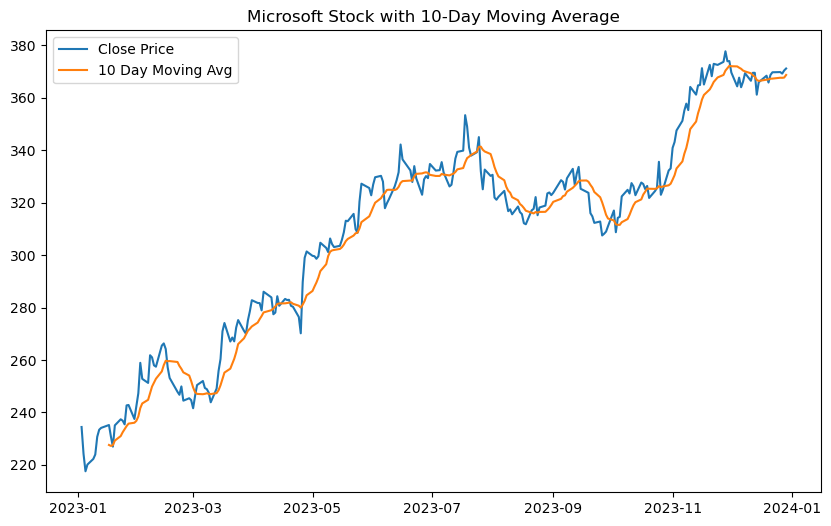

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(msft.index, msft["Close"], label="Close Price")
plt.plot(msft.index, msft["10 Day MA"], label="10 Day Moving Avg")
plt.legend()
plt.title("Microsoft Stock with 10-Day Moving Average")
plt.show()

### 📊 Insights
- **Stock Trend**  
  - The 10-day moving average reveals whether the stock was in an uptrend (price above MA) or downtrend (price below MA).

- **Risk / Volatility**  
  - Volatility shows how much the stock fluctuated daily.  
  - High volatility = more risk, Low volatility = more stability.

- **Daily Returns**  
  - Show short-term gains and losses.  
  - Useful for identifying stable growth periods vs. sudden drops.

---

### 💡 Investor Takeaways
- If **price > MA** and volatility is low → indicates a stable uptrend.  
- If **price < MA** and volatility is high → indicates a risky downtrend.  
- This analysis helps understand Microsoft’s performance in 2023 and forms the base for further forecasting or investment strategies.